<a href="https://colab.research.google.com/github/mikhailstasyuk/dls-mipt/blob/main/%5Bhomework_4_2_%5Dgame_of_thrones_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

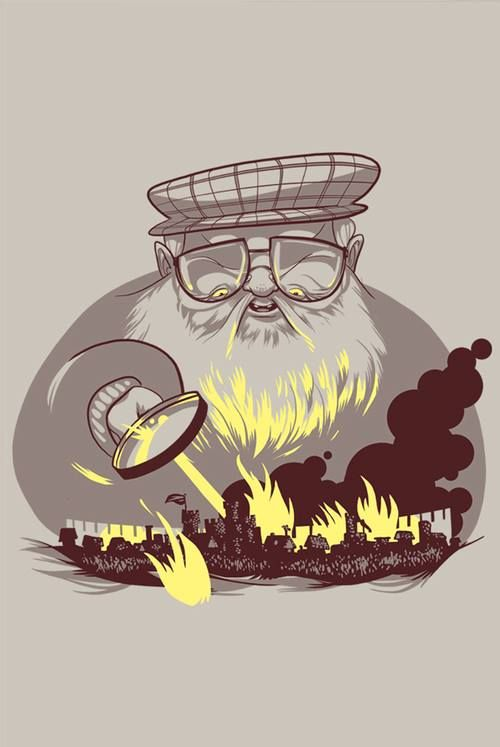

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 40.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 19.3MB/s]


In [2]:
!mkdir -p data/
!mv game_of_thrones_test.csv data/
!mv game_of_thrones_train.csv data/

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [3]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

ROOT_DIR = pathlib.Path().absolute()
DATA_DIR = ROOT_DIR/'data'

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [4]:
df = pd.read_csv(DATA_DIR/"game_of_thrones_train.csv", index_col="S.No")
df.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [5]:
df[['culture']].value_counts()

,count
culture,
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Dothraki,17
Ghiscari,17
Dornish,17
Reach,13


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

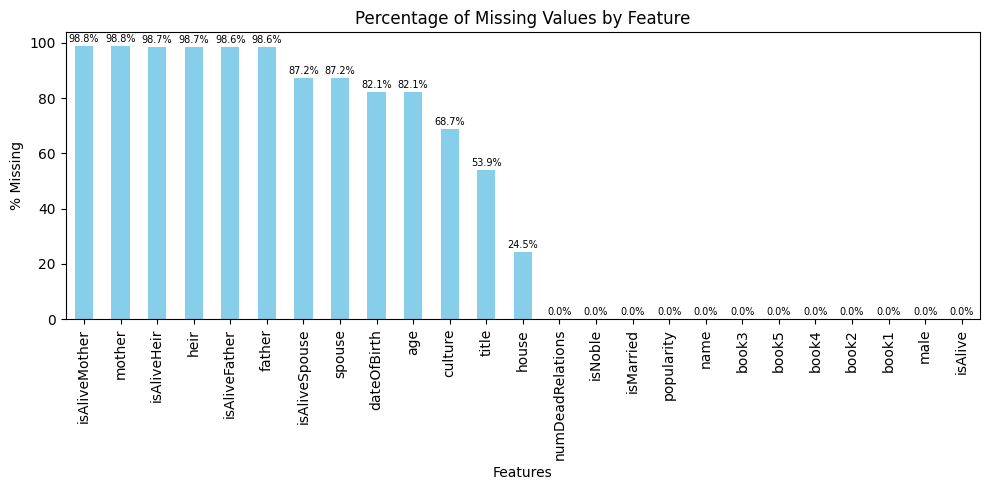

In [6]:
def plot_missing_cols(df):
    """
    Plots the percentage of missing values for each column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    pd.DataFrame: A DataFrame containing the percentage of missing values for each column.
    """
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

    missing_value_df = missing_value_df.sort_values(by='percent_missing', ascending=False)

    ax = missing_value_df.plot(kind='bar', figsize=(10, 5), legend=False, color='skyblue')
    ax.set_title('Percentage of Missing Values by Feature')
    ax.set_xlabel('Features')
    ax.set_ylabel('% Missing')
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=7, color='black',
                    xytext=(0, 5), textcoords='offset points')
    return missing_value_df

missing_value_df = plot_missing_cols(df)

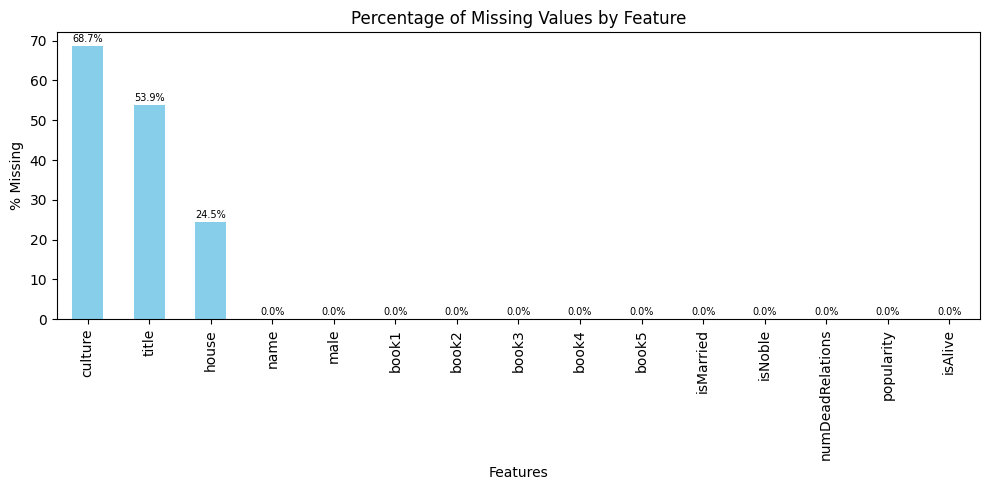

In [7]:
THRESHOLD = 70
cols_to_drop = missing_value_df[missing_value_df.percent_missing > THRESHOLD].index.tolist()
df_no_empty_cols = df.drop(columns=cols_to_drop)
_ = plot_missing_cols(df_no_empty_cols)

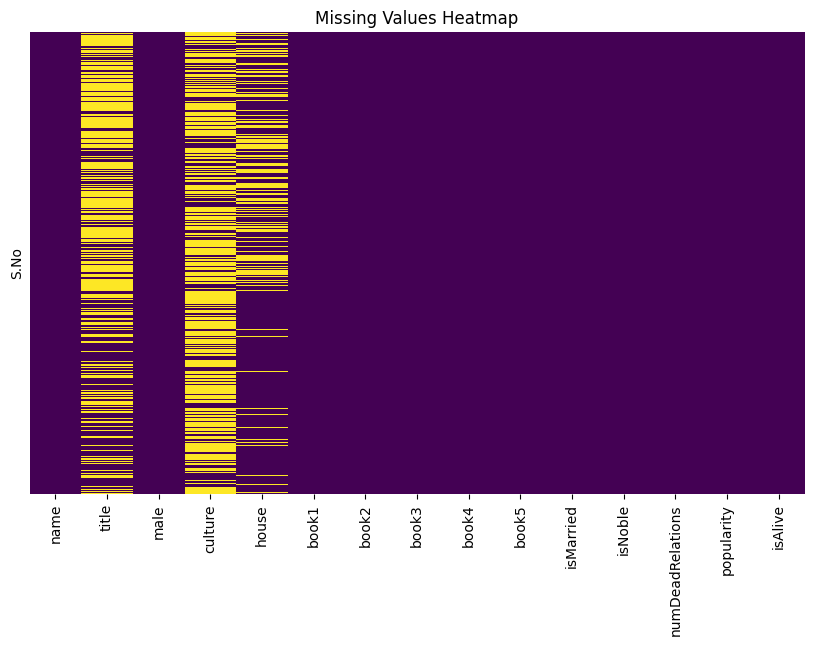

In [8]:
# Create a mask of missing values
missing_mask = df_no_empty_cols.isna()

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Adjust size as needed
sns.heatmap(missing_mask, cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

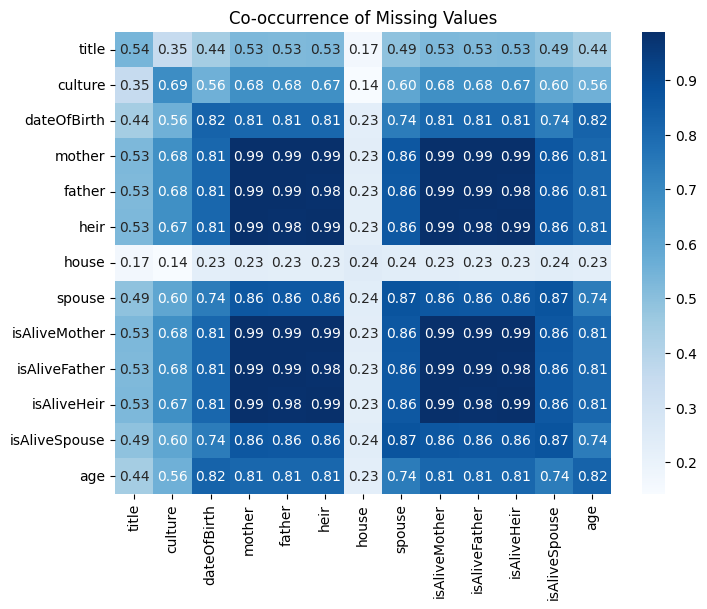

In [9]:
missing_counts = df.isna().sum()
missing_cols = missing_counts[missing_counts > 0].index.tolist()
missing_mask = df[missing_cols].isna().astype(int)

co_occurrence = missing_mask.T.dot(missing_mask)

co_occurrence_normalized = co_occurrence / len(df)

plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_normalized, annot=True, cmap="Blues", cbar=True, fmt=".2f")
plt.title("Co-occurrence of Missing Values")
plt.show()

### Заполнение пропусков


In [10]:
cult = {
    'summer islands': ['summer islands', 'summer islander', 'summer isles'],
    'ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
    'asshai': ["asshai'i", 'asshai'],
    'lysene': ['lysene', 'lyseni'],
    'andal': ['andal', 'andals'],
    'braavosi': ['braavosi', 'braavos'],
    'dornish': ['dornishmen', 'dorne', 'dornish'],
    'myrish': ['myr', 'myrish', 'myrmen'],
    'westermen': ['westermen', 'westerman', 'westerlands'],
    'westerosi': ['westeros', 'westerosi'],
    'stormlander': ['stormlands', 'stormlander'],
    'norvoshi': ['norvos', 'norvoshi'],
    'northmen': ['the north', 'northmen'],
    'free folk': ['wildling', 'first men', 'free folk'],
    'qartheen': ['qartheen', 'qarth'],
    'reach': ['the reach', 'reach', 'reachmen'],
}

cult_mapping = {}

for cult_key, cult_names in cult.items():
    for cult_name in cult_names:
        cult_mapping[cult_name] = cult_key

In [11]:
df_cult_simplified = df_no_empty_cols.copy()

df_cult_simplified['culture'] = df_cult_simplified.culture.str.lower().apply(lambda cult_name: cult_mapping.get(cult_name, cult_name))
df_cult_simplified.culture.value_counts()

,count
culture,
northmen,103
ironborn,92
free folk,56
braavosi,40
valyrian,28
dornish,21
ghiscari,18
dothraki,17
westermen,14


In [12]:
# Персонажи Free Folk не имеют признака House по намерению автора,
# а не случайным образом, поэтому мы можем заполнить пропуски,
# присвоив им категорию independent
mask = (df_cult_simplified.culture == 'free folk') & (df_cult_simplified.house.isna())
df_cult_simplified.loc[mask, 'house'] = 'Independent'
df_cult_simplified[df_cult_simplified.culture == 'free folk']

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,
26,Willow Witch-eye,NaN,0,free folk,Independent,0,0,0,0,1,0,0,0,0.050167,0
128,Rowan,NaN,1,free folk,Independent,0,0,0,0,1,0,0,0,0.060201,0
135,Ryk,NaN,1,free folk,Independent,0,0,1,1,1,1,0,0,0.026756,1
168,Squirrel,NaN,0,free folk,Independent,0,0,0,0,1,0,0,0,0.043478,0
175,Stone Thumbs,NaN,0,free folk,Independent,0,0,1,0,0,0,0,0,0.003344,0
192,Thistle,NaN,0,free folk,Independent,0,0,0,0,1,0,0,0,0.016722,0
200,Toefinger,NaN,1,free folk,Independent,0,0,1,1,0,0,0,0,0.006689,1
205,Toregg,NaN,1,free folk,Independent,0,0,1,1,1,0,0,0,0.026756,1
327,Arson,NaN,1,free folk,Independent,0,0,1,0,0,0,0,0,0.000000,1


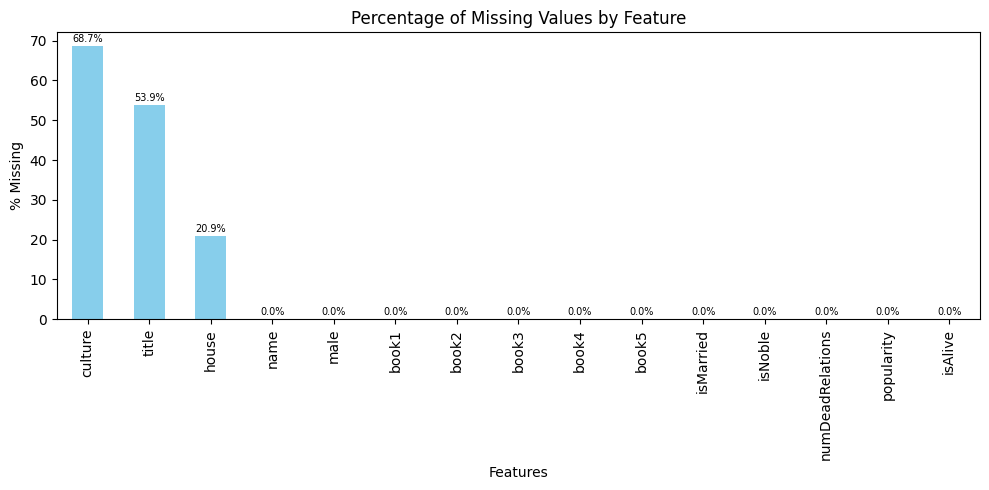

In [13]:
_ = plot_missing_cols(df_cult_simplified)

In [14]:
house = {
  "independent": "independent",
  "house frey": "house tully",
  "house swyft": "house lannister",
  "house arryn": "house tully",
  "house santagar": "house martell",
  "house targaryen": "house targaryen",
  "house osgrey": "house tully",
  "night's watch": "independent",
  "house humble": "house greyjoy",
  "house wylde": "house tully",
  "house wode": "house tully",
  "house fell": "house stark",
  "brotherhood without banners": "independent",
  "house webber": "house tully",
  "house greyjoy": "house greyjoy",
  "house stark": "house stark",
  "house waynwood": "house arryn",
  "house dayne": "house martell",
  "house manderly": "house stark",
  "house farwynd of the lonely light": "house greyjoy",
  "happy port": "independent",
  "house of loraq": "independent",
  "kingswood brotherhood": "independent",
  "house botley": "house greyjoy",
  "burned men": "independent",
  "house velaryon": "house targaryen",
  "house tallhart": "house stark",
  "house tyrell": "house tyrell",
  "house blackwood": "house tully",
  "house blackfyre": "house targaryen",
  "wildling": "independent",
  "kingdom of the three daughters": "independent",
  "house royce of the gates of the moon": "house arryn",
  "house nayland": "house tully",
  "house vance of wayfarer's rest": "house tully",
  "house rowan": "house tyrell",
  "house farrow": "house tully",
  "house lonmouth": "house greyjoy",
  "house reyne": "house lannister",
  "house ashford": "house tyrell",
  "house brax": "house tyrell",
  "house paege": "house tully",
  "house hollard": "house lannister",
  "house tarth": "house baratheon",
  "house ryswell": "house stark",
  "house lannister": "house lannister",
  "house crakehall": "house lannister",
  "house darklyn": "house lannister",
  "house westerling": "house lannister",
  "house weaver": "house tully",
  "house connington": "house targaryen",
  "house stout": "house stark",
  "house harclay": "house stark",
  "house drumm": "house greyjoy",
  "house lannister of lannisport": "house lannister",
  "house crabb": "house lannister",
  "drowned men": "independent",
  "stormcrows": "independent",
  "antler men": "independent",
  "house spicer": "house lannister",
  "house staunton": "house lannister",
  "house stonetree": "house stark",
  "house leygood": "house tyrell",
  "house bolton": "house stark",
  "house sparr": "house tyrell",
  "house fossoway of cider hall": "house tyrell",
  "house varner": "house tyrell",
  "house tarly": "house baratheon",
  "peach": "independent",
  "house lynderly": "house arryn",
  "house ironmaker": "house greyjoy",
  "house martell": "house martell",
  "house clegane": "house lannister",
  "house costayne": "house martell",
  "house heddle": "house stark",
  "stone crows": "independent",
  "house ryger": "house targaryen",
  "sea watch": "independent",
  "second sons": "independent",
  "moon brothers": "independent",
  "house baelish": "independent",
  "faceless men": "independent",
  "brave companions": "independent",
  "house frey of riverrun": "house tully",
  "house stokeworth": "house lannister",
  "house hightower": "house tyrell",
  "band of nine": "independent",
  "house oakheart": "house tyrell",
  "house sharp": "house tyrell",
  "house hunt": "house tyrell",
  "house bracken": "house tully",
  "house whent": "house tully",
  "house dalt": "house martell",
  "house charlton": "house tyrell",
  "house butterwell": "house tully",
  "house qorgyle": "house martell",
  "house ambrose": "house tully",
  "alchemists' guild": "independent",
  "house bushy": "house tully",
  "house blacktyde": "house greyjoy",
  "house beesbury": "house hightower",
  "house baratheon": "house baratheon",
  "house bulwer": "house lannister",
  "house cafferen": "house baratheon",
  "house smallwood": "house stark",
  "house payne": "house lannister",
  "house buckler": "house baratheon",
  "house tully": "house tully",
  "black ears": "independent",
  "house caswell": "house baratheon",
  "house conklyn": "house tully",
  "house greenhill": "house tyrell",
  "house karstark": "house stark",
  "house redfort": "house arryn",
  "house baratheon of dragonstone": "house baratheon",
  "house deddings": "house tully",
  "house slynt": "house baratheon",
  "house plumm": "house baratheon",
  "house redwyne": "house tyrell",
  "house manwoody": "house martell",
  "house harlaw": "house greyjoy",
  "house risley": "house tully",
  "faith of the seven": "independent",
  "pureborn": "independent",
  "house codd": "house stark",
  "house willum": "house tully",
  "house of galare": "independent",
  "r'hllor": "independent",
  "house morrigen": "house stark",
  "house corbray": "house arryn",
  "house gaunt": "house tully",
  "house goodbrother": "house greyjoy",
  "kingsguard": "independent",
  "house grafton": "house arryn",
  "house hornwood": "house stark",
  "house grandison": "house lannister",
  "house sawyer": "house lannister",
  "house uffering": "house lannister",
  "house bolling": "house lannister",
  "house clifton": "house tully",
  "house blackberry": "house lannister",
  "chataya's brothel": "independent",
  "house norcross": "house tully",
  "house mallister": "house stark",
  "house fossoway of new barrel": "house tyrell",
  "house swann": "house tyrell",
  "house cupps": "house tully",
  "house penny": "house tully",
  "house penrose": "house baratheon",
  "house umber": "house stark",
  "house vance of atranta": "house tully",
  "brotherhood without banners": "independent",
  "house royce": "house arryn",
  "house tawney": "house tyrell",
  "windblown": "independent",
  "house piper": "house tully",
  "house serry": "house tully",
  "house lorch": "house lannister",
  "house lefford": "house lannister",
  "house strong": "house targaryen",
  "house roote": "house stark",
  "house hardy": "house stark",
  "queensguard": "independent",
  "house meadows": "house tully",
  "house dondarrion": "house baratheon",
  "house lothston": "house stark",
  "house yew": "house tully",
  "house mullendore": "house tully",
  "house florent": "house tyrell",
  "house mertyns": "house tyrell",
  "house boggs": "house stark",
  "house woods": "house stark",
  "house inchfield": "house tyrell",
  "house blackmont": "house martell",
  "house pemford": "house tully",
  "house kenning of harlaw": "house greyjoy",
  "house shepherd": "house tyrell",
  "house estermont": "house baratheon",
  "house wynch": "house tully",
  "house staedmon": "house tully",
  "house seaworth": "independent",
  "city watch of king's landing": "independent",
  "house cockshaw": "house lannister",
  "house graceford": "house tyrell",
  "house stackspear": "house lannister",
  "house haigh": "house lannister",
  "house jast": "house tyrell",
  "house farring": "house tyrell",
  "house celtigar": "house targaryen",
  "house of ghazeen": "independent",
  "house byrch": "house stark",
  "house hawick": "house tully",
  "house belmore": "house tyrell",
  "house broom": "house tully",
  "house brune of brownhollow": "house stark",
  "house cassel": "house stark",
  "house rosby": "house baratheon",
  "house harlaw of harridan hill": "house greyjoy",
  "house cuy": "house tully",
  "house caron": "house martell",
  "house cerwyn": "house stark",
  "house vaith": "house tyrell",
  "house vance": "house tully",
  "house shett of gull tower": "house stark",
  "house vypren": "house tyrell",
  "house marbrand": "house lannister",
  "house hardyng": "house tully",
  "house allyrion": "house martell",
  "house locke": "house stark",
  "house bar emmon": "house baratheon",
  "house mooton": "house baratheon",
  "house norridge": "house tully",
  "house hunter": "house stark",
  "house hayford": "house baratheon",
  "house glover": "house stark",
  "house brune of the dyre den": "house stark",
  "house prester": "house tully",
  "house fowler": "house tully",
  "house goodbrook": "house tully",
  "house greenfield": "house tyrell",
  "house gower": "house tyrell",
  "blacks": "house targaryen",
  "house hewett": "house tully",
  "house borrell": "house greyjoy",
  "house peake": "house tyrell",
  "citadel": "independent",
  "wise masters": "independent",
  "good masters": "independent",
  "house sunglass": "house tully",
  "house grimm": "house tully",
  "the citadel": "independent",
  "house mollen": "house tyrell",
  "house hoare": "house greyjoy",
  "house rambton": "house tully",
  "house harlaw of the tower of glimmering": "house greyjoy",
  "house wull": "house stark",
  "house wagstaff": "house stark",
  "house vyrwel": "house tully",
  "house darry": "house tully",
  "house lydden": "house tully",
  "house bettley": "house tully",
  "house myre": "house tully",
  "house mormont": "house stark",
  "house reed": "house stark",
  "house kenning of kayce": "house greyjoy",
  "house of pahl": "independent",
  "house turnberry": "house tyrell",
  "house blackbar": "house greyjoy",
  "house woolfield": "house tully",
  "house fossoway": "house tyrell",
  "house mallery": "house tully",
  "house chyttering": "house baratheon",
  "house flint of widow's watch": "house stark",
  "house lychester": "independent",
  "house vikary": "house targaryen",
  "house selmy": "house baratheon",
  "house volmark": "house greyjoy",
  "house merlyn": "independent",
  "house crane": "house targaryen",
  "house sarsfield": "house lannister",
  "house of merreq": "independent",
  "house chester": "independent",
  "house jordayne": "house martell",
  "iron bank of braavos": "independent",
  "house goodbrother of shatterstone": "house greyjoy",
  "house toland": "house targaryen",
  "house baratheon": "house baratheon",
  "house yronwood": "house martell",
  "house kettleblack": "house baratheon",
  "house wythers": "independent",
  "house norrey": "house stark",
  "house foote": "house baratheon",
  "house chelsted": "independent",
  "house banefort": "house lannister",
  "house ball": "house targaryen",
  "house cox": "house targaryen",
  "house ruttiger": "independent",
  "house estren": "independent",
  "house rykker": "house baratheon",
  "house longwaters": "house targaryen",
  "house thorne": "house stark",
  "house moreland": "independent",
  "house flint": "house stark",
  "house hogg": "independent",
  "house longthorpe": "independent",
  "house coldwater": "house targaryen",
  "house leek": "independent",
  "house farman": "house lannister",
  "house harlaw of harlaw hall": "house greyjoy",
  "house templeton": "independent",
  "house wells": "independent",
  "house toyne": "house targaryen",
  "house liddle": "house lannister",
  "house gargalen": "house martell",
  "house mudd": "independent",
  "house farwynd": "house greyjoy",
  "house sunderland": "house greyjoy",
  "house hetherspoon": "independent",
  "house uller": "house martell",
  "house wayn": "independent",
  "house tollett": "independent",
  "house poole": "independent",
  "maesters": "independent",
  "house blanetree": "independent",
  "house blount": "house baratheon",
  "golden company": "house targaryen",
  "company of the cat": "independent",
  "house suggs": "independent",
  "khal": "independent",
  "house nymeros martell": "house martell",
  "house drinkwater": "independent",
  "house harlaw of grey garden": "house greyjoy",
  "summer islands": "independent",
  "house condon": "independent",
  "house lannister": "house lannister",
  "house moore": "independent"
}

In [15]:
import numpy as np

df_new_greathouse = df_cult_simplified.copy()

df_new_greathouse['great_house'] = df_new_greathouse.house.str.lower().apply(lambda house_name: house.get(house_name, np.nan))
df_new_greathouse.great_house.value_counts()

,count
great_house,
independent,285
house tully,255
house stark,149
house tyrell,123
house lannister,121
house greyjoy,82
house targaryen,71
house baratheon,57
house martell,47


###### Построим модель для заполнения пропусков в признаке great_house

In [16]:
mask = (df_new_greathouse.great_house.isna() == False) & (df_new_greathouse.culture.isna() == False)
df_greathouse_cult_nona = df_new_greathouse[mask]
msg = "Количество объектов с заполненными признаками great_house и culture:"
print(msg, len(df_greathouse_cult_nona))
print("Эти объекты обладают информацией, подходящей для заполнения пропусков в great_house.")

Количество объектов с заполненными признаками great_house и culture: 383
Эти объекты обладают информацией, подходящей для заполнения пропусков в great_house.


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Удалим ненужные признаки
df_greathouse_cult_clean = df_greathouse_cult_nona.drop(
    columns=["name", "title", "house", "isAlive"]).reset_index(drop=True)

# Закодируем категоральный признак culture и заменим его на получившиеся dummies
enc = OneHotEncoder()
encoded = enc.fit_transform(df_greathouse_cult_clean.culture.to_frame())

known_categories = enc.categories_[0]
culture_dummies = pd.DataFrame(encoded.toarray().astype(int), columns=known_categories)

df_greathouse_cult_encoded = df_greathouse_cult_clean.copy().drop(columns=["culture"])
df_greathouse_cult_encoded = pd.concat((df_greathouse_cult_encoded, culture_dummies), axis=1)
# df_greathouse_cult_encoded

# Разделим выборку на признаки и таргеты (целевая переменная culture текстовая,
# поэтому закодируем ее, используя LabelEncoder)
label_encoder = LabelEncoder()

X = df_greathouse_cult_encoded.drop(columns=["great_house"])
y = df_greathouse_cult_encoded.great_house
y_encoded = label_encoder.fit_transform(y)
# y_encoded

# Разделим выборку на обучающую и тестовую части
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, random_state=1, shuffle=True, stratify=y, test_size=0.2)

print("Числок строк в обучающей части:", len(X_train))
print("Числок строк в тестовой части:", len(X_test))

Числок строк в обучающей части: 306
Числок строк в тестовой части: 77


In [18]:
# Обучим классификаторы и выберем лучший
classifier_grid = {
    "LogisticRegression": (
        LogisticRegression(),
        {'classifier__C': [0.1, 1, 10], 'classifier__penalty': ['l2']}
    ),
    "AdaBoostClassifier": (
        AdaBoostClassifier(),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1]
        }
    ),
    "RandomForestClassifier": (
        RandomForestClassifier(),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [5, 10, 20]
        }
    ),
    "GaussianProcessClassifier": (
        GaussianProcessClassifier(),
        {}
    ),
    "GaussianNB": (
        GaussianNB(),
        {}
    ),
    "KNeighborsClassifier": (
        KNeighborsClassifier(),
        {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ),
    "SVC": (
        SVC(),
        {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
    ),
    "DecisionTreeClassifier": (
        DecisionTreeClassifier(),
        {
            'classifier__max_depth': [None, 10, 20],
            'classifier__criterion': ['gini', 'entropy']
        }
    ),
}

results = {}
for name, (classifier, params) in classifier_grid.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    print(f"Обучаю {name}...")
    grid_search = GridSearchCV(
        estimator=pipe, param_grid=params, scoring='accuracy', cv=3, n_jobs=2
    )
    grid_search.fit(X_train, y_train)

    accuracy = grid_search.score(X_test, y_test)

    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy
    }

# for clf_name, result in results.items():
    # print(f"{clf_name}:\n\tBest Params: {result['best_params']}\n\tAccuracy: {result['accuracy']:.4f}")

sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

best_model, best_info = sorted_results[0]
best_accuracy = best_info['accuracy']

print(f"\nЛучшая модель: {best_model}. Accuracy: {best_accuracy:.4f}")

print("\nМодели, отсортированные по точности:")
for name, info in sorted_results:
    print(f"{name}: Accuracy = {info['accuracy']:.4f}")

class_names = pd.DataFrame(label_encoder.classes_, columns=["Class"])
print("\nКлассы и соответствующие им номера:")
print(class_names)

Обучаю LogisticRegression...
Обучаю AdaBoostClassifier...
Обучаю RandomForestClassifier...
Обучаю GaussianProcessClassifier...
Обучаю GaussianNB...
Обучаю KNeighborsClassifier...
Обучаю SVC...
Обучаю DecisionTreeClassifier...

Лучшая модель: SVC. Accuracy: 0.8442

Модели, отсортированные по точности:
SVC: Accuracy = 0.8442
LogisticRegression: Accuracy = 0.8182
RandomForestClassifier: Accuracy = 0.8182
KNeighborsClassifier: Accuracy = 0.8182
GaussianNB: Accuracy = 0.8052
GaussianProcessClassifier: Accuracy = 0.7922
DecisionTreeClassifier: Accuracy = 0.7792
AdaBoostClassifier: Accuracy = 0.7013

Классы и соответствующие им номера:
             Class
0      house arryn
1  house baratheon
2    house greyjoy
3  house lannister
4    house martell
5      house stark
6  house targaryen
7      house tully
8     house tyrell
9      independent


In [19]:
# Теперь обучим лучший классификатор еще раз, а затем заполним часть пропусков
# признака great_house.

best_params = results[best_model]['best_params']
clf = classifier_grid[best_model][0]  # The classifier object

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', clf)
])

pipe.set_params(**best_params)
pipe.fit(X, y_encoded)

mask = (df_new_greathouse.great_house.isna() == True) & \
       (df_new_greathouse.culture.isna() == False) & \
       (df_new_greathouse.culture.isin(known_categories)) # выбираем только известные классификатору категории

df_greathouse_nan = df_new_greathouse[mask]

# Снова удаляем ненужные признаки и кодируем признак culture
dummies = enc.transform(df_greathouse_nan.culture.to_frame())
culture_encoded = pd.DataFrame(dummies.toarray().astype(int), columns=enc.categories_[0])
df_greathouse_nan_encoded = df_greathouse_nan.copy().drop(columns=["name", "title", "house", "culture", "great_house", "isAlive"]).reset_index(drop=True)
df_greathouse_nan_encoded = pd.concat((df_greathouse_nan_encoded, culture_encoded), axis=1)
# df_greathouse_nan_encoded

# Заполним предсказаниями часть пропусков признака great_house
# в исходном наборе данных
df_new_greathouse_imputed = df_new_greathouse.copy().drop(columns=['house'])
y_pred = pipe.predict(df_greathouse_nan_encoded)
pred_class_to_names = class_names.Class.loc[y_pred].to_numpy()
df_new_greathouse_imputed.loc[df_new_greathouse[mask].index, "great_house"] = pred_class_to_names
df_new_greathouse_imputed.great_house.value_counts()
df_new_greathouse_imputed

,name,title,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,great_house
S.No,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,0,0,0,0,0,0,0,11,0.605351,0,NaN
2,Walder Frey,Lord of the Crossing,1,rivermen,1,1,1,1,1,1,1,1,0.896321,1,house tully
3,Addison Hill,Ser,1,NaN,0,0,0,1,0,0,1,0,0.267559,1,house lannister
4,Aemma Arryn,Queen,0,NaN,0,0,0,0,0,1,1,0,0.183946,0,house tully
5,Sylva Santagar,Greenstone,0,dornish,0,0,0,1,0,1,1,0,0.043478,1,house martell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,1,0,1,1,0,0,1,0,0.160535,1,NaN
1554,Masha Heddle,NaN,0,NaN,1,1,0,0,0,0,0,0,0.040134,0,NaN
1555,Matthos Seaworth,NaN,1,NaN,0,1,1,1,1,0,0,0,0.076923,0,independent


In [20]:
# Можем восстановить еще несколько пропусков great_house, используя название culture
mask = (df_new_greathouse_imputed.great_house.isna()) & (df_new_greathouse_imputed.culture.isna() == False)
df_new_greathouse_imputed[mask]

,name,title,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,great_house
S.No,,,,,,,,,,,,,,,
150,Serra,NaN,0,lysene,0,0,0,0,1,1,0,0,0.016722,1,NaN
210,Tregar Ormollen,NaN,1,lysene,0,1,0,1,0,0,0,0,0.023411,1,NaN
271,Tobho Mott,NaN,1,qohor,1,1,1,1,1,0,0,0,0.083612,1,NaN
392,Byan Votyris,NaN,1,norvoshi,1,0,0,0,0,0,0,0,0.000000,1,NaN
500,Erreg,King,0,andal,0,0,1,0,0,0,1,0,0.016722,1,NaN
1027,Eroeh,NaN,0,lhazareen,1,1,0,0,1,0,0,0,0.033445,0,NaN
1103,Hugor of the Hill,King of the Andals,1,andal,0,0,0,0,1,0,1,0,0.050167,1,NaN
1255,Mysaria,Mistress of whisperers,0,lysene,0,0,0,0,0,0,1,0,0.013378,1,NaN
1269,Ordello,Magister of Pentos,0,pentoshi,0,0,0,0,1,0,1,0,0.013378,0,NaN


In [21]:
# Судя по всему, некоторые датапоинты - это представители независимых народов, поэтому присвоим им категорию independent
independent_cults = ["braavosi", "qartheen", "lysene", "tyroshi", "qohor","norvoshi", "pentoshi"]
mask = (df_new_greathouse_imputed.great_house.isna()) & (df_new_greathouse_imputed.culture.isin(independent_cults))
df_new_greathouse_imputed.loc[mask, "great_house"] = 'independent'

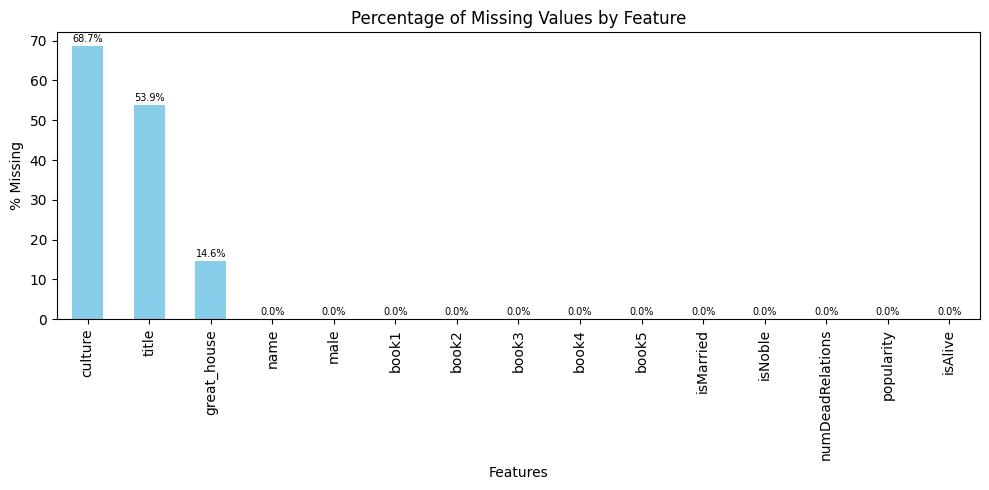

In [22]:
_ = plot_missing_cols(df_new_greathouse_imputed)

In [23]:
# Обучим еще одну модель и восстановим оставшиеся пропуски признака great_house.
# На этот раз мы не будем использовать признак culture
df_greathouse_imputed_nona = df_new_greathouse_imputed.drop(
    columns=["name", "title", "culture", "isAlive"]).reset_index(drop=True)
mask = (df_greathouse_imputed_nona.great_house.isna() == False)
df_greathouse_imputed_nona = df_greathouse_imputed_nona[mask]

# Разделим выборку на признаки и таргеты (целевая переменная culture текстовая,
# поэтому закодируем ее, используя LabelEncoder)
label_encoder = LabelEncoder()

X = df_greathouse_imputed_nona.drop(columns=["great_house"])
y = df_greathouse_imputed_nona.great_house
y_encoded = label_encoder.fit_transform(y)
# y_encoded

# Разделим выборку на обучающую и тестовую части
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, random_state=1, shuffle=True, test_size=0.2)

print("Числок строк в обучающей части:", len(X_train))
print("Числок строк в тестовой части:", len(X_test))

# Обучим классификаторы и выберем лучший
classifier_grid = {
    "LogisticRegression": (
        LogisticRegression(),
        {'classifier__C': [0.1, 1, 10], 'classifier__penalty': ['l2']}
    ),
    "AdaBoostClassifier": (
        AdaBoostClassifier(),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1]
        }
    ),
    "RandomForestClassifier": (
        RandomForestClassifier(),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [5, 10, 20]
        }
    ),
    "GaussianProcessClassifier": (
        GaussianProcessClassifier(),
        {}
    ),
    "GaussianNB": (
        GaussianNB(),
        {}
    ),
    "KNeighborsClassifier": (
        KNeighborsClassifier(),
        {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ),
    "SVC": (
        SVC(),
        {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
    ),
    "DecisionTreeClassifier": (
        DecisionTreeClassifier(),
        {
            'classifier__max_depth': [None, 10, 20],
            'classifier__criterion': ['gini', 'entropy']
        }
    ),
}

results = {}
for name, (classifier, params) in classifier_grid.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    print(f"Обучаю {name}...")
    grid_search = GridSearchCV(
        estimator=pipe, param_grid=params, scoring='accuracy', cv=3, n_jobs=2
    )
    grid_search.fit(X_train, y_train)

    accuracy = grid_search.score(X_test, y_test)

    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy
    }

# for clf_name, result in results.items():
    # print(f"{clf_name}:\n\tBest Params: {result['best_params']}\n\tAccuracy: {result['accuracy']:.4f}")

sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

best_model, best_info = sorted_results[0]
best_accuracy = best_info['accuracy']

print(f"\nЛучшая модель: {best_model}. Accuracy: {best_accuracy:.4f}")

print("\nМодели, отсортированные по точности:")
for name, info in sorted_results:
    print(f"{name}: Accuracy = {info['accuracy']:.4f}")

class_names = pd.DataFrame(label_encoder.classes_, columns=["Class"])
print("\nКлассы и соответствующие им номера:")
print(class_names)

Числок строк в обучающей части: 1064
Числок строк в тестовой части: 266
Обучаю LogisticRegression...
Обучаю AdaBoostClassifier...
Обучаю RandomForestClassifier...
Обучаю GaussianProcessClassifier...
Обучаю GaussianNB...
Обучаю KNeighborsClassifier...
Обучаю SVC...
Обучаю DecisionTreeClassifier...

Лучшая модель: RandomForestClassifier. Accuracy: 0.4098

Модели, отсортированные по точности:
RandomForestClassifier: Accuracy = 0.4098
SVC: Accuracy = 0.3872
GaussianProcessClassifier: Accuracy = 0.3835
LogisticRegression: Accuracy = 0.3684
KNeighborsClassifier: Accuracy = 0.3609
DecisionTreeClassifier: Accuracy = 0.3609
AdaBoostClassifier: Accuracy = 0.3459
GaussianNB: Accuracy = 0.0414

Классы и соответствующие им номера:
              Class
0       house arryn
1   house baratheon
2     house greyjoy
3   house hightower
4   house lannister
5     house martell
6       house stark
7   house targaryen
8       house tully
9      house tyrell
10      independent


In [24]:
best_params = results[best_model]['best_params']
clf = classifier_grid[best_model][0]

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', clf)
])

pipe.set_params(**best_params)
pipe.fit(X, y_encoded)

mask = df_new_greathouse_imputed.great_house.isna()
df_greathouse_imputed_final = df_new_greathouse_imputed[mask].drop(
    columns=["great_house", "name", "title", "culture", "isAlive"])
df_greathouse_imputed_final

# # Заполним предсказаниями оставшуюся часть пропусков признака great_house
y_pred = pipe.predict(df_greathouse_imputed_final)
pred_class_to_names = class_names.Class.loc[y_pred].to_numpy()
# pred_class_to_names
df_greathouse_imputed = df_new_greathouse.copy()
df_greathouse_imputed.loc[df_new_greathouse[mask].index, "great_house"] = pred_class_to_names
df_greathouse_imputed.great_house.value_counts()

,count
great_house,
independent,447
house tully,284
house stark,161
house tyrell,127
house lannister,122
house targaryen,89
house greyjoy,83
house baratheon,57
house martell,47


In [25]:
independent_cults = ["braavosi", "qartheen", "lysene", "tyroshi", "qohor","norvoshi", "pentoshi"]
mask = (df_greathouse_imputed.great_house.isna()) & (df_greathouse_imputed.culture.isin(independent_cults))
df_greathouse_imputed[mask].culture.value_counts()

,count
culture,
braavosi,35
qartheen,4
lysene,3
tyroshi,2
qohor,1
norvoshi,1
pentoshi,1


In [26]:
# Судя по всему, некоторые датапоинты - это представители независимых народов, поэтому присвоим им категорию independent
df_greathouse_imputed.loc[mask, "great_house"] = 'independent'

In [27]:
# Посмотрим на оставшиеся пропуски
mask = df_greathouse_imputed.great_house.isna()
df_greathouse_imputed[mask].culture.value_counts()

,count
culture,
ironborn,17
dothraki,11
northmen,8
ghiscari,7
summer islands,3
astapori,3
reach,2
valyrian,2
westerosi,1


In [28]:
# Заполним оставшиеся пропуски great_house модами
# по соответсвующим признаками culture
mode_values = df_greathouse_imputed.groupby('culture')['great_house'].agg(lambda x: x.mode()[0])
df_greathouse_imputed['great_house'] = df_greathouse_imputed.apply(lambda row: mode_values[row['culture']] if pd.isna(row['great_house']) else row['great_house'], axis=1)

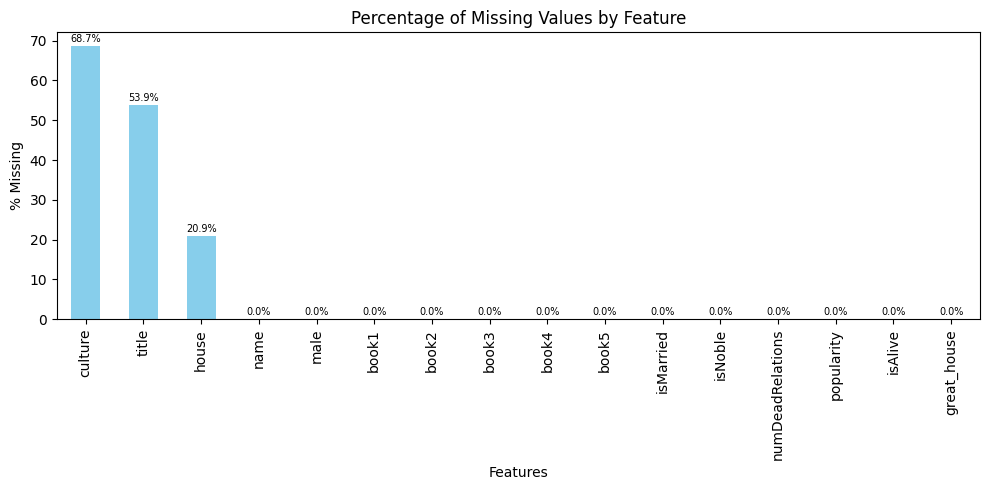

In [29]:
_ = plot_missing_cols(df_greathouse_imputed)

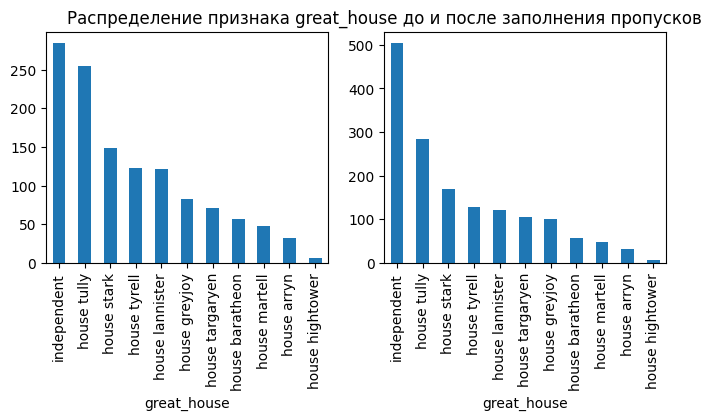

In [30]:
df_imputed = df_greathouse_imputed.drop(columns=["culture", "title", "name", "house"])
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
df_new_greathouse.great_house.value_counts().plot(kind="bar", ax=axs[0])
df_imputed.great_house.value_counts().plot(kind="bar", ax=axs[1]);
plt.title("Распределение признака great_house до и после заполнения пропусков", x=0.0)
plt.show()

In [31]:
df_imputed['age'] = df['age']
medians = df_imputed.groupby('great_house').agg('age').median()
df_imputed['age'] = df_imputed.apply(
    lambda row: medians[row['great_house']] if pd.isna(row['age']) else row['age'], axis=1
)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [32]:
df_imputed['isPopular'] = (df_imputed.popularity >= 0.18).astype(int)
df_imputed['boolDeadRelations'] = (df_imputed.numDeadRelations > 0).astype(int)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [33]:
enc = OneHotEncoder()

dummies = enc.fit_transform(df_imputed.great_house.to_frame())
dumframe = pd.DataFrame(dummies.toarray(), columns=enc.categories_[0])
df_encoded = pd.concat(
    (df_imputed.drop(columns=["great_house"]).reset_index(drop=True), dumframe), axis=1)
correlation_mat = df_encoded.corr()
print(correlation_mat["isAlive"].sort_values(ascending=False))

isAlive              1.000000
book4                0.284014
house martell        0.057974
house tully          0.044591
house arryn          0.044586
house tyrell         0.042546
book5                0.032531
independent          0.029394
book3                0.018427
house greyjoy        0.013613
house baratheon      0.013423
house hightower     -0.016736
house lannister     -0.017076
house stark         -0.027607
isMarried           -0.049381
book2               -0.055998
isNoble             -0.060572
book1               -0.112468
male                -0.148290
age                 -0.165296
boolDeadRelations   -0.178177
popularity          -0.194187
numDeadRelations    -0.198876
house targaryen     -0.201860
isPopular           -0.227026
Name: isAlive, dtype: float64


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

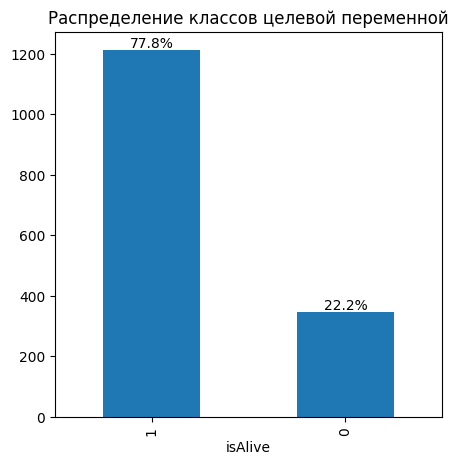

In [34]:
total_count = len(df_encoded)
alive_counts = df_encoded.isAlive.value_counts()
percentages = alive_counts.values / total_count * 100

plt.figure(figsize=(5, 5))
plt.title("Распределение классов целевой переменной")
ax = alive_counts.plot.bar(x='isAlive', y='count')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{pct:.1f}%' for pct in percentages])
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [35]:
df_encoded_new = df_encoded.copy()

df_encoded_new['new_feat'] = (df_encoded_new['book4'] + df_encoded_new['book5']) / df_encoded_new['popularity']

df_encoded_new['no_books'] = (df_encoded_new[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1) == 0).astype(int)
df_encoded_new

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,...,house hightower,house lannister,house martell,house stark,house targaryen,house tully,house tyrell,independent,new_feat,no_books
0,1,0,0,0,0,0,0,0,11,0.605351,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1
1,1,1,1,1,1,1,1,1,1,0.896321,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.231343,0
2,1,0,0,0,1,0,0,1,0,0.267559,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.737500,0
3,0,0,0,0,0,0,1,1,0,0.183946,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1
4,0,0,0,0,1,0,1,1,0,0.043478,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,1,1,0,1,1,0,0,1,0,0.160535,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.229167,0
1553,0,1,1,0,0,0,0,0,0,0.040134,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0
1554,1,0,1,1,1,1,0,0,0,0.076923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.000000,0
1555,0,0,1,1,1,1,0,0,0,0.270903,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.382716,0


In [36]:
correlation_mat = df_encoded_new.corr()
print(correlation_mat["isAlive"].sort_values(ascending=False))

isAlive              1.000000
book4                0.284014
new_feat             0.256656
house martell        0.057974
house tully          0.044591
house arryn          0.044586
house tyrell         0.042546
book5                0.032531
independent          0.029394
book3                0.018427
house greyjoy        0.013613
house baratheon      0.013423
house hightower     -0.016736
house lannister     -0.017076
house stark         -0.027607
isMarried           -0.049381
book2               -0.055998
isNoble             -0.060572
book1               -0.112468
male                -0.148290
age                 -0.165296
boolDeadRelations   -0.178177
no_books            -0.191062
popularity          -0.194187
numDeadRelations    -0.198876
house targaryen     -0.201860
isPopular           -0.227026
Name: isAlive, dtype: float64


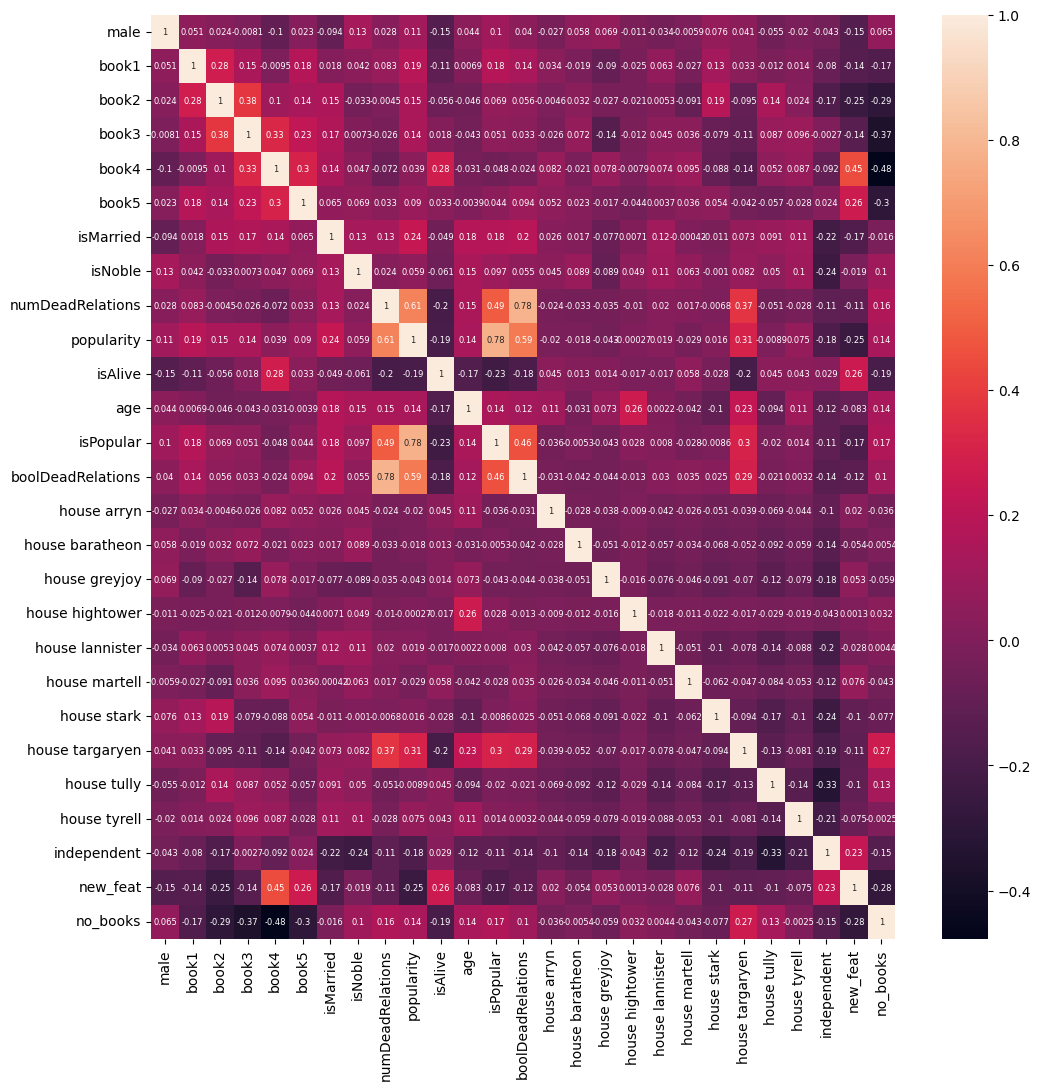

In [37]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_encoded_new.corr(), annot=True, annot_kws={'size': 6})
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [38]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [39]:
# X = df_encoded.drop(columns=["isAlive"])
# y = df_encoded.isAlive
X = df_encoded_new.drop(columns=["isAlive"])
y = df_encoded_new.isAlive

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, shuffle=True, test_size=0.2)

In [42]:
# Обучим классификаторы и выберем лучший
classifier_grid = {
    "LogisticRegression": (
        LogisticRegression(),
        {'classifier__C': [0.1, 1, 10], 'classifier__penalty': ['l2']}
    ),
    "AdaBoostClassifier": (
        AdaBoostClassifier(),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1]
        }
    ),
    "RandomForestClassifier": (
        RandomForestClassifier(random_state=1),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [5, 10, 20]
        }
    ),
    "GaussianProcessClassifier": (
        GaussianProcessClassifier(),
        {}
    ),
    "GaussianNB": (
        GaussianNB(),
        {}
    ),
    "KNeighborsClassifier": (
        KNeighborsClassifier(),
        {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ),
    "SVC": (
        SVC(),
        {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
    ),
    "DecisionTreeClassifier": (
        DecisionTreeClassifier(),
        {
            'classifier__max_depth': [None, 10, 20],
            'classifier__criterion': ['gini', 'entropy']
        }
    ),
}

results = {}
for name, (classifier, params) in classifier_grid.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    print(f"Обучаю {name}...")
    grid_search = GridSearchCV(
        # estimator=pipe, param_grid=params, scoring='accuracy', cv=9, n_jobs=2
        estimator=pipe, param_grid=params, scoring='roc_auc', cv=9, n_jobs=2
    )
    grid_search.fit(X_train, y_train)

    accuracy = grid_search.score(X_test, y_test)

    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy
    }
    print(results[name])
sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

best_model, best_info = sorted_results[0]
best_accuracy = best_info['accuracy']

print(f"\nЛучшая модель: {best_model}. Accuracy: {best_accuracy:.4f}")

print("\nМодели, отсортированные по точности:")
for name, info in sorted_results:
    print(f"{name}: Accuracy = {info['accuracy']:.4f}")

Обучаю LogisticRegression...


ValueError: 
All the 27 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 652, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 586, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 1540, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py", line 894, in fit
    return self.partial_fit(X, y, sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py", line 930, in partial_fit
    X = validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 2944, in validate_data
    out = check_array(X, input_name="X", **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains infinity or a value too large for dtype('float64').


In [133]:
subset1 = df_imputed[df_imputed.isAlive == 0].reset_index(drop=True)
subset2 = df_imputed[df_imputed.isAlive == 1].sample(len(subset1)).reset_index(drop=True)
df_downsampled = pd.concat((subset1, subset2)).reset_index(drop=True)
df_downsampled

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,great_house,age,isPopular,boolDeadRelations
0,1,0,0,0,0,0,0,0,11,0.605351,0,house targaryen,33.0,1,1
1,0,0,0,0,0,0,1,1,0,0.183946,0,house tully,23.0,1,0
2,1,0,0,0,0,0,1,1,0,0.431438,0,house targaryen,26.0,1,0
3,1,0,0,0,0,0,0,0,5,0.678930,0,house targaryen,33.0,1,1
4,1,0,0,1,0,0,0,1,0,0.006689,0,independent,24.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,0,0,0,1,0,0,0,0,0.010033,1,independent,24.0,0,0
686,0,0,0,0,0,0,0,1,0,0.003344,1,house tyrell,31.0,0,0
687,0,0,0,1,0,0,0,0,0,0.006689,1,independent,24.0,0,0
688,0,0,0,0,1,1,0,1,0,0.010033,1,house lannister,25.5,0,0


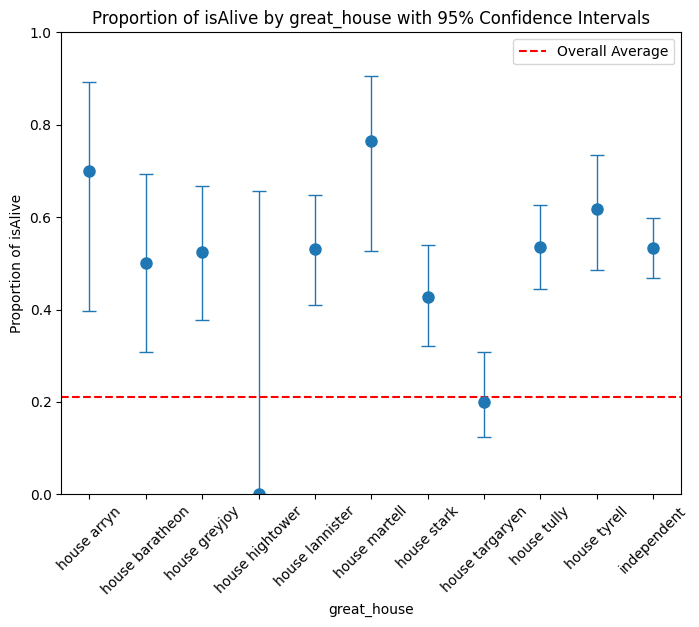

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def wilson_score_interval(successes, n, confidence=0.95):
    """Calculates the Wilson score interval for a binomial proportion."""
    if n == 0:
        return (0, 0)
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    p_hat = successes / n
    denominator = 1 + z**2 / n
    center = (p_hat + z**2 / (2 * n)) / denominator
    radius = z * np.sqrt((p_hat * (1 - p_hat) + z**2 / (4 * n)) / n) / denominator
    lower_bound = center - radius
    upper_bound = center + radius
    return (lower_bound, upper_bound)

# Group by category and calculate the proportion of 'isAlive'
grouped = df_downsampled.groupby('great_house')['isAlive'].agg(['sum', 'count']).reset_index()
grouped.columns = ['great_house', 'Successes', 'Total']
grouped['Proportion'] = grouped['Successes'] / grouped['Total']

# Calculate the confidence intervals
grouped['CI_lower'], grouped['CI_upper'] = zip(*grouped.apply(
    lambda row: wilson_score_interval(row['Successes'], row['Total']), axis=1
))

# Calculate the overall average
overall_average = df['isAlive'].mean()

# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
plt.errorbar(x=grouped['great_house'],
             y=grouped['Proportion'],
             yerr=[grouped['Proportion'] - grouped['CI_lower'], grouped['CI_upper'] - grouped['Proportion']],
             fmt='o',
             capsize=5,
             linewidth=1,
             markersize=8)

# Add the horizontal line for the average
plt.axhline(y=overall_average, color='r', linestyle='--', label='Overall Average')

plt.xlabel('great_house')
plt.ylabel('Proportion of isAlive')
plt.title('Proportion of isAlive by great_house with 95% Confidence Intervals')
plt.ylim(0, 1)
plt.legend() # Show the label for the average line
plt.xticks(rotation=45)
plt.show()

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8012820512820513

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)